# Final Notebook


## Preparation


In [4]:
# add src to path
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath("../src"))

In [5]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# common imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display
from IPython.core.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split

## Data Exploration Analysis


### Import data


In [7]:
df = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

### Auxiliary functions


In [8]:
# Function to create scrollable table within a small window
def create_scrollable_table(df: pd.DataFrame, table_id: str, title: str):
    html = f"<h3>{title}</h3>"
    html += f'<div id="{table_id}" style="height:600px; overflow:auto;">'
    html += df.to_html()
    html += "</div>"
    return html


def render_scrooll(df: pd.Series, title: str = ""):
    html_null_values = create_scrollable_table(df.to_frame(), "Scrollable", title)

    display(HTML(html_null_values))

In [9]:
def graph_price_bar(df: pd.DataFrame, feature_name: str, title: str):
    """This function return a plotly express figute for with a bar chart of the price and another feature

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe that has the data
    feature_name : str
        The name of the column that will be use as the x-axis
    title : str
        The title of the plot

    Return
    ------
    fig: Figure
        The plotly express figure
    """
    colors = px.colors.qualitative.Plotly
    feature_to_prices = df.groupby(feature_name)["SalePrice"].mean()
    fig = px.bar(
        x=feature_to_prices.index,
        y=feature_to_prices.values,
        title=title,
        # color_discrete_sequence=["purple", "green"],
        text=feature_to_prices.values,
        template="plotly_dark",
    )

    fig.update_traces(
        marker_color=colors, texttemplate="$%{text:,.0f}", textposition="outside"
    )
    fig.update_yaxes(title="Sale Price", tickprefix="$", tickformat=",")
    fig.update_xaxes(title=title)
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    return fig

### Summary Statistics


In [10]:
# numerical features statistics
num_features = df.select_dtypes(include=[np.number])
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
# drop numberic columns
drop_col = ["Id"]
df = df.drop(columns=drop_col)

In [12]:
# categorical features statistics
num_features = df.select_dtypes(include=[object])
display(num_features.describe().T)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [13]:
# check for missing data
null_data = df.isnull().sum()
render_scrooll(null_data)

# html_null_values = create_scrollable_table(
#     null_data.to_frame(), "null_values", "Null values in the dataset"
# )

# display(HTML(html_null_values))


percent_null = (null_data / len(df)) * 100
render_scrooll(percent_null)

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


,0
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
LotConfig,0.000000


### Price graphs


In [14]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df["SalePrice"])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(
    x=df["SalePrice"],
    nbinsx=50,
    name="Histogram",
    opacity=0.75,
    histnorm="probability density",
    marker=dict(color="purple"),
)

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df["SalePrice"].min(), df["SalePrice"].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(
    x=x_norm,
    y=y_norm,
    mode="lines",
    name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})",
    line=dict(color="green"),
)

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)",
    font=dict(color="white"),
)

# Create a Q-Q plot
qq_data = stats.probplot(df["SalePrice"], dist="norm")
qq_fig = px.scatter(
    x=qq_data[0][0],
    y=qq_data[0][1],
    labels={"x": "Theoretical Quantiles", "y": "Ordered Values"},
    color_discrete_sequence=["purple"],
)
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)",
    font=dict(color="white"),
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(
    qq_data[0][0], qq_data[0][1]
)
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(
    x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green")
)

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

# notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

### Distributions


In [15]:
# interested colomun to check againts the salePrice
distribution_colums = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
]

In [16]:
df["MSZoning"].name

'MSZoning'

In [17]:
for col_name in distribution_colums:
    graph_price_bar(df, col_name, col_name).show()

#### Property age when sold


In [18]:
df["PropertyAge"] = df["YrSold"] - df["YearBuilt"]

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df["PropertyAge"].corr(df["SalePrice"])
print(f"Correlation between Property Age and Sale Price: {age_price_corr}")

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(
    df,
    x="PropertyAge",
    y="SalePrice",
    title="Property Age vs Sale Price",
    color="PropertyAge",
    color_continuous_scale=px.colors.sequential.Greens_r,
)

fig9.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
)

fig9.show()

Correlation between Property Age and Sale Price: -0.5233504175468159


In [19]:
above_grade_living = df["GrLivArea"].corr(df["SalePrice"])
print(
    f"Correlation between Living Area (above grade) and Sale Price: {above_grade_living}"
)


fig10 = px.scatter(
    df,
    x="GrLivArea",
    y="SalePrice",
    title="Living Area (above grade) vs Sale Price",
    color="GrLivArea",
    color_continuous_scale=px.colors.sequential.Greens_r,
)

fig10.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
)

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


In [20]:
yearly_avg_sale_price = df.groupby("YrSold")["SalePrice"].mean()

fig13 = px.box(
    df,
    x="YrSold",
    y="SalePrice",
    title="Sale Price Trends Over the Years",
    points=False,
    color_discrete_sequence=["green"],
)

fig13.add_trace(
    px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0]
)

fig13.update_traces(
    line=dict(color="purple", width=4), selector=dict(type="scatter", mode="lines")
)

for year, avg_price in yearly_avg_sale_price.items():
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color="white"),
        showarrow=False,
        bgcolor="rgba(128, 0, 128, 0.6)",
    )

fig13.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
    xaxis_title="Year Sold",
    yaxis_title="Sale Price",
)

fig13.show()

## Model Trainig


### Data cleaning


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

### Linear Regression


In [23]:
# get categorical and numberical columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop("SalePrice")

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ],
    remainder="passthrough",
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])


X = df.drop("SalePrice", axis=1)
y = np.log(df["SalePrice"])  # normalize salePrice using natural logarithm
X_preprocessed = pipeline.fit_transform(X)

In [24]:
# pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=[("preprocessor", preprocessor), ("pca", pca)])

X_pca = pipeline_pca.fit_transform(X)

In [25]:
def train_linear(preprocessedX, k_folds=3):
    """This function train and test a model using gridSearch, hyperparameters,
    and k-fold. It then display the best hyperparameter to use with the linear regression.
    """

    # Split the data into training and testing sets using 20 percent for testing
    X_train, X_test, y_train, y_test = train_test_split(
        preprocessedX, y, test_size=0.2, random_state=42
    )

    # Define the models if intending to add more
    models = {
        "LinearRegression": LinearRegression(),
    }

    # Define the hyperparameter grids for each model, this will be use to find the best parameter to use
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    # https://stackoverflow.com/questions/59489830/select-best-parameters-for-regression-model-using-gridsearch
    param_grids = {
        "LinearRegression": {
            "fit_intercept": [True, False],
            "copy_X": [True, False],
            "positive": [True, False],
        },
    }

    # 3-fold cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Train and tune the models using the grid to check the best combination
    grids = {}
    for model_name, model in models.items():
        print(f"Training and tuning {model_name}...")
        grids[model_name] = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=cv,
            scoring="neg_mean_squared_error",
            n_jobs=-1,
            verbose=2,
        )
        grids[model_name].fit(X_train, y_train)
        best_params = grids[model_name].best_params_
        best_score = np.sqrt(-1 * grids[model_name].best_score_)

        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best RMSE for {model_name}: {best_score}\n")

In [26]:
train_linear(X_preprocessed)

Training and tuning LinearRegression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.3s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.3s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.1s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.1s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.1s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.3s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.3s
[CV] END ...copy_X=False, fit_intercept=True, positive=False; total time=   0.0s
[CV] END 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


2 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 611, in fit
    self.coef_ =

Best parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best RMSE for LinearRegression: 0.22949682624756962



In [27]:
train_linear(X_pca)

Training and tuning LinearRegression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END 

In [28]:
# Create the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Train model
pca_model = LinearRegression()
# pca_model = LinearRegression(copy_X=True, fit_intercept=True, positive=False) # commented since those are the default values
pca_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# test data
y_pred = pca_model.predict(X_test)

In [30]:
# import sklean model testing methods

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  # type: ignore

# test model using the predicted y and the test y (original not modified y)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# uses the square=False attribute to return the not squared (root)
rmse = root_mean_squared_error(
    y_test,
    y_pred,
)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}\nMSE: {mse}\n\nRMSE: {rmse}\nR2: {r2}")

MAE: 0.10320436091492441
MSE: 0.020100915180789707

RMSE: 0.14177769634462858
R2: 0.8922858570508921


<Axes: xlabel='SalePrice'>

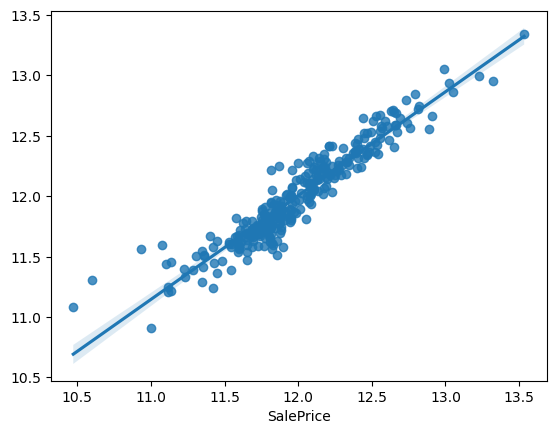

In [31]:
sns.regplot(x=y_test, y=y_pred)

In [32]:
# df.iloc[130].drop(columns=["SalePrice"]).to_dict(orient="index")
# test_dic_obs = df.head(1).drop(columns=["SalePrice"]).to_dict(orient="index").get(0)
test_dic_obs = df.head(1).drop(columns=["SalePrice"]).to_dict(orient="list")
display(test_dic_obs)

{'MSSubClass': [60],
 'MSZoning': ['RL'],
 'LotFrontage': [65.0],
 'LotArea': [8450],
 'Street': ['Pave'],
 'Alley': [nan],
 'LotShape': ['Reg'],
 'LandContour': ['Lvl'],
 'Utilities': ['AllPub'],
 'LotConfig': ['Inside'],
 'LandSlope': ['Gtl'],
 'Neighborhood': ['CollgCr'],
 'Condition1': ['Norm'],
 'Condition2': ['Norm'],
 'BldgType': ['1Fam'],
 'HouseStyle': ['2Story'],
 'OverallQual': [7],
 'OverallCond': [5],
 'YearBuilt': [2003],
 'YearRemodAdd': [2003],
 'RoofStyle': ['Gable'],
 'RoofMatl': ['CompShg'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['BrkFace'],
 'MasVnrArea': [196.0],
 'ExterQual': ['Gd'],
 'ExterCond': ['TA'],
 'Foundation': ['PConc'],
 'BsmtQual': ['Gd'],
 'BsmtCond': ['TA'],
 'BsmtExposure': ['No'],
 'BsmtFinType1': ['GLQ'],
 'BsmtFinSF1': [706],
 'BsmtFinType2': ['Unf'],
 'BsmtFinSF2': [0],
 'BsmtUnfSF': [150],
 'TotalBsmtSF': [856],
 'Heating': ['GasA'],
 'HeatingQC': ['Ex'],
 'CentralAir': ['Y'],
 'Electrical': ['SBrkr'],
 '1stFl

In [33]:
testObservation = {
    "MSSubClass": [60],
    "MSZoning": ["RL"],
    "LotFrontage": [65.0],
    "LotArea": [8450],
    "Street": ["Pave"],
    "Alley": [np.NaN],
    "LotShape": ["Reg"],
    "LandContour": ["Lvl"],
    "Utilities": ["AllPub"],
    "LotConfig": ["Inside"],
    "LandSlope": ["Gtl"],
    "Neighborhood": ["CollgCr"],
    "Condition1": ["Norm"],
    "Condition2": ["Norm"],
    "BldgType": ["1Fam"],
    "HouseStyle": ["2Story"],
    "OverallQual": [7],
    "OverallCond": [5],
    "YearBuilt": [2003],
    "YearRemodAdd": [2003],
    "RoofStyle": ["Gable"],
    "RoofMatl": ["CompShg"],
    "Exterior1st": ["VinylSd"],
    "Exterior2nd": ["VinylSd"],
    "MasVnrType": ["BrkFace"],
    "MasVnrArea": [196.0],
    "ExterQual": ["Gd"],
    "ExterCond": ["TA"],
    "Foundation": ["PConc"],
    "BsmtQual": ["Gd"],
    "BsmtCond": ["TA"],
    "BsmtExposure": ["No"],
    "BsmtFinType1": ["GLQ"],
    "BsmtFinSF1": [706],
    "BsmtFinType2": ["Unf"],
    "BsmtFinSF2": [0],
    "BsmtUnfSF": [150],
    "TotalBsmtSF": [856],
    "Heating": ["GasA"],
    "HeatingQC": ["Ex"],
    "CentralAir": ["Y"],
    "Electrical": ["SBrkr"],
    "1stFlrSF": [856],
    "2ndFlrSF": [854],
    "LowQualFinSF": [0],
    "GrLivArea": [1710],
    "BsmtFullBath": [1],
    "BsmtHalfBath": [0],
    "FullBath": [2],
    "HalfBath": [1],
    "BedroomAbvGr": [3],
    "KitchenAbvGr": [1],
    "KitchenQual": ["Gd"],
    "TotRmsAbvGrd": [8],
    "Functional": ["Typ"],
    "Fireplaces": [0],
    "FireplaceQu": ["NaN"],
    "GarageType": ["Attchd"],
    "GarageYrBlt": [2003.0],
    "GarageFinish": ["RFn"],
    "GarageCars": [2],
    "GarageArea": [548],
    "GarageQual": ["TA"],
    "GarageCond": ["TA"],
    "PavedDrive": ["Y"],
    "WoodDeckSF": [0],
    "OpenPorchSF": [61],
    "EnclosedPorch": [0],
    "3SsnPorch": [0],
    "ScreenPorch": [0],
    "PoolArea": [0],
    "PoolQC": ["N"],
    "Fence": ["N"],
    "MiscFeature": ["N"],
    "MiscVal": [0],
    "MoSold": [2],
    "YrSold": [2008],
    "SaleType": ["WD"],
    "SaleCondition": ["Normal"],
    "PropertyAge": [5],
}

In [34]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,8
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,32
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,69
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,60


In [35]:
observation2 = pd.DataFrame(testObservation)
observation2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,N,N,N,0,2,2008,WD,Normal,5


In [36]:
observation3 = pd.DataFrame(test_dic_obs)
observation3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5


In [37]:
obs_3 = pipeline_pca.transform(X=observation3)
obs_3

array([[ 2.47626203, -0.38325331, -2.2153092 , -1.88868405,  0.29446764,
        -0.01081552,  1.09289066, -1.68191574, -0.43443422, -0.04613599,
         0.48351586,  0.18798734,  1.06158853, -0.02387473, -0.19334382,
        -0.3043321 ,  0.33468596, -0.99078953, -0.06786747, -0.91394887,
         0.31801132,  0.39667377, -0.10639986,  0.27366378,  0.52124771,
        -0.15245279, -0.85833121, -0.56444771,  0.86742263, -0.36614081,
        -0.00876242,  0.38247664,  0.0860486 ,  0.06231819,  0.27888397,
        -0.27480166,  0.09757176,  0.11913194, -0.20713196,  0.02097581,
        -0.38392415, -0.20003525,  0.12384987,  0.11475716, -0.03820219,
         0.12997707, -0.19382403, -0.13181044, -0.27492137, -0.2687509 ,
         0.45007607,  0.0957024 ,  0.44435294, -0.20044001,  0.10913155,
        -0.06826186,  0.06340328, -0.00876328, -0.15533292,  0.06838763,
        -0.01571719, -0.01865243,  0.02062881, -0.13216367, -0.16235111,
         0.02656563, -0.00343014,  0.04780895, -0.2

In [38]:
X_pca[0]

array([ 2.47626203e+00, -3.83253311e-01, -2.21530920e+00, -1.88868405e+00,
        2.94467557e-01, -1.08156649e-02,  1.09289029e+00, -1.68191528e+00,
       -4.34434269e-01, -4.61360726e-02,  4.83515080e-01,  1.87986790e-01,
        1.06158752e+00, -2.38738888e-02, -1.93343530e-01, -3.04333130e-01,
        3.34685512e-01, -9.90787927e-01, -6.78674111e-02, -9.13945842e-01,
        3.18011861e-01,  3.96675917e-01, -1.06397420e-01,  2.73662599e-01,
        5.21245413e-01, -1.52459897e-01, -8.58312726e-01, -5.64437359e-01,
        8.67412288e-01, -3.66093636e-01, -8.66669627e-03,  3.82487067e-01,
        8.61534343e-02,  6.24250808e-02,  2.78879986e-01, -2.74814379e-01,
        9.76746252e-02,  1.19124733e-01, -2.06894503e-01,  2.10215591e-02,
       -3.83990061e-01, -2.00348900e-01,  1.23791502e-01,  1.14677464e-01,
       -3.83603271e-02,  1.30786530e-01, -1.93831126e-01, -1.31684746e-01,
       -2.74318953e-01, -2.68380682e-01,  4.50081625e-01,  9.66178309e-02,
        4.44864467e-01, -

In [39]:
def predict_observation(
    df: pd.DataFrame,
    processorPipeline: Pipeline = pipeline_pca,
    model: LinearRegression = pca_model,
):
    obs = processorPipeline.transform(df)

    # the target was normalized using natural logarithm, so we need to use np.exp to get the actual value
    pred = np.exp(model.predict(obs.reshape(1, -1))[0])
    return pred

In [40]:
# The actual price of the row at index 0, which the observation is based on.
print(f"Price: {df.iloc[0]['SalePrice']}")

Price: 208500


In [41]:
# obs_proccessed = pipeline_pca.fit_transform(observation2)
prediction = np.exp(pca_model.predict(obs_3.reshape(1, -1))[0])
prediction

212729.38480495068

In [43]:
predict_observation(observation3)

212729.38480495068